In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
import plotly.express as px
from scipy import stats


In [2]:
df = pd.read_csv(r"C:\Users\egimenez\Downloads\Datasets\WineQT.csv")

# Exploration
Check the size, the different columns and the overall state of our data frame.

In [3]:
df.shape

(1143, 13)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df = df.drop(labels="Id", axis=1)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see that there aren't any missing values, so now we can start our visualizations.

# Visualization of data

We start with a boxplot of different columns to check the outliers and the distribution of values.

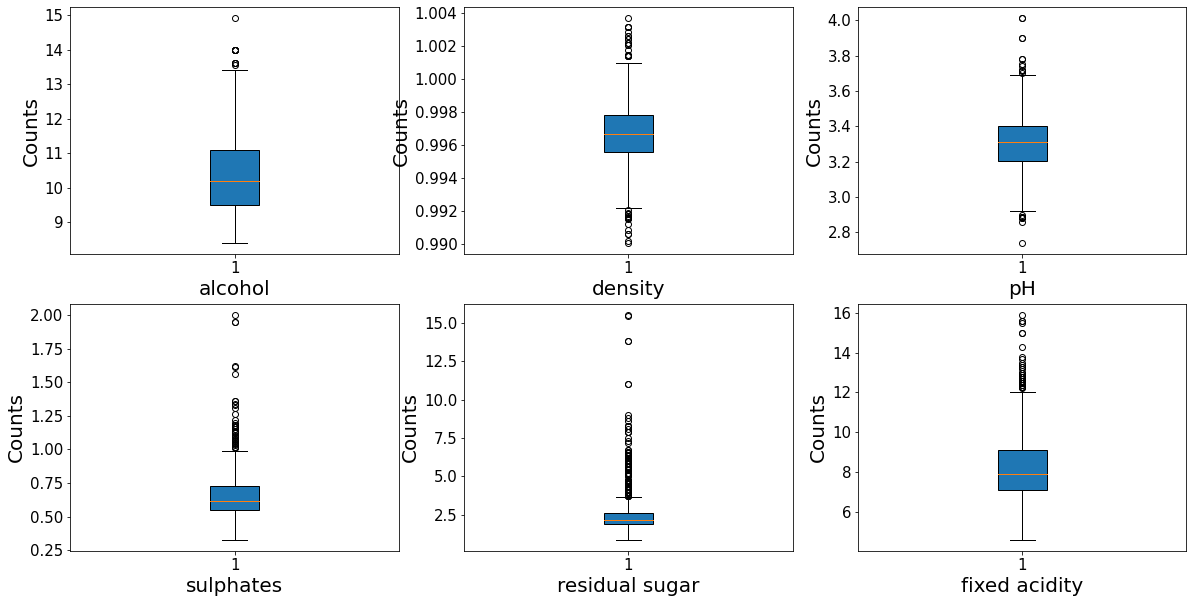

In [8]:
# set up the figure size

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 3)

# Specify the features of interest
num_features2 = ['alcohol', 'density', 'pH', 'sulphates', 'residual sugar', 'fixed acidity']
xaxes = num_features2
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.boxplot(df[num_features2[idx]],patch_artist=True)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

# Detecting and eliminating outliers 

We utilize the Z Score to complete this task.

In [9]:
z = np.abs(stats.zscore(df))
threshold = 3
print(np.where(z > 3))


(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
         88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
        161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
        244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
        324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
        399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
        462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
        572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
        714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
        890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
        934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
       1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
       1122], dtype=int64), array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
        9,  3,  3,  

In [10]:
df = df[(z < 3).all(axis=1)]


In [11]:
df.shape

(1041, 12)

# Search correlations

We start with a Pairplot and then we go deeper.

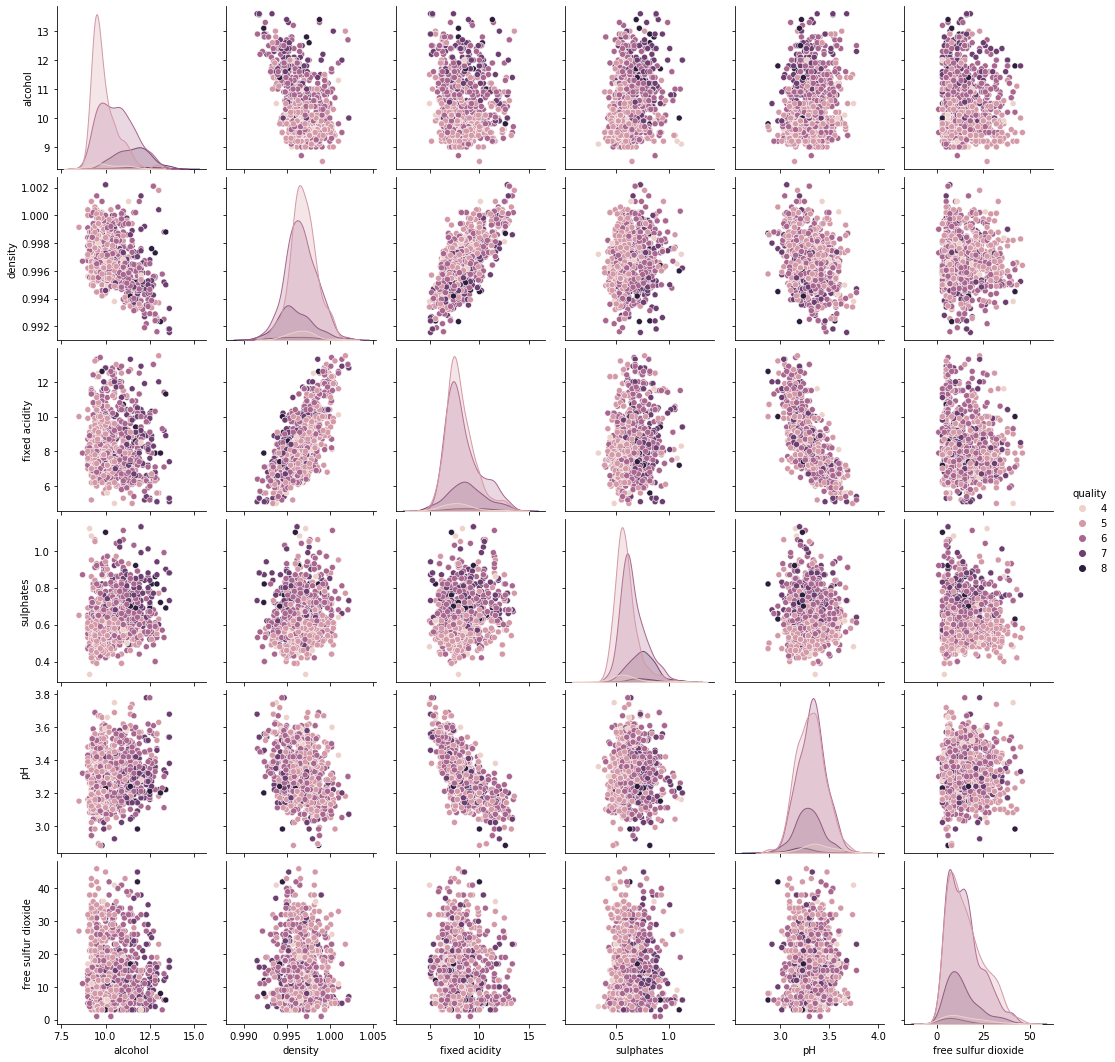

In [12]:
sns.pairplot(x_vars=['alcohol' , 'density','fixed acidity','sulphates', 'pH', 'free sulfur dioxide'] ,
y_vars=['alcohol' , 'density','fixed acidity','sulphates', 'pH', 'free sulfur dioxide'] ,
hue = 'quality',
data = df)

We can see there seems to be strong correlations between:

Alcohol & Density

Density & Fixed acidity

Fixed acidity & pH

While sulphites and fee sulfur dioxide seem to have no correlation whatsoever.

Let's go deeper into this correlations.

# Alcohol vs density

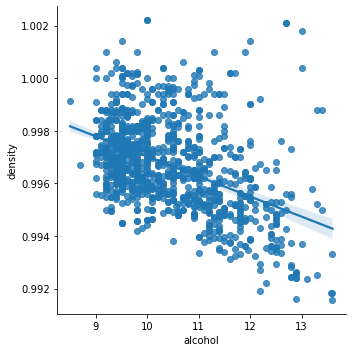

In [13]:
first_correlation = sns.lmplot(x="alcohol", y="density", data= df);


# Density vs fixed acidity

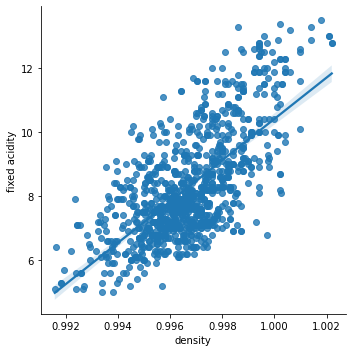

In [14]:
second_correlation = sns.lmplot(x="density", y="fixed acidity", data= df);


# Fixed acidity vs pH

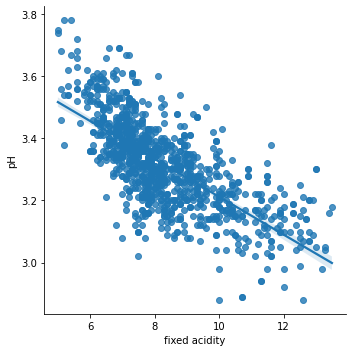

In [15]:
third_correlation = sns.lmplot(x="fixed acidity", y="pH", data= df);


# Wine quality

Let's check the quality of our wines. Is the majority of them of good, medium or low quality?

<AxesSubplot:xlabel='quality', ylabel='Density'>

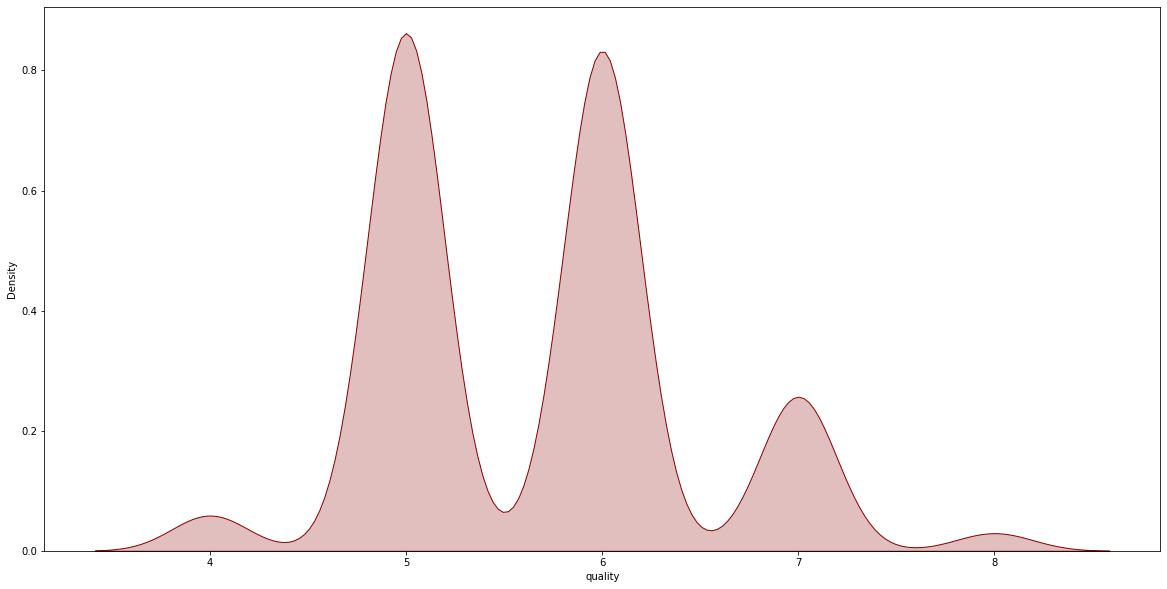

In [16]:
sns.kdeplot(x = 'quality' , data = df , color = 'darkred', shade = True)


We can conclude that most wines have a medium quality of 5. 

# Is it possible to predict the quality of a wine using this dataframe?

In [25]:
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
4,30,30,30,30,30,30,30,30,30,30,30
5,440,440,440,440,440,440,440,440,440,440,440
6,425,425,425,425,425,425,425,425,425,425,425
7,131,131,131,131,131,131,131,131,131,131,131
8,15,15,15,15,15,15,15,15,15,15,15


In [28]:
df['quality'].value_counts() / len(df) * 100

5    42.267051
6    40.826129
7    12.584054
4     2.881844
8     1.440922
Name: quality, dtype: float64

# Conclusion

Given that more than 80% of the wines are of average quality (5-6), it's not possible to make a correct assesment of which characteristics that influence quality.